In [16]:
import os
import urllib.request
from wand.image import Image
from wand.display import display

In [2]:
folder = "assets"
out = "out"

In [3]:
img_url = "http://andrewd.ces.clemson.edu/images/ppm/lena256.ppm"

img_name = os.path.basename(img_url)
# downloadImage(img_url, img_name)

asset_org = "{}/{}".format(folder, img_name)
asset_out = "{}/{}".format(out, img_name)


Open image

In [4]:
img = Image(filename=asset_org, format=os.path.splitext(img_name)[1][1:])

In [9]:
# display(img)
img

Transfer image pixels to array

In [52]:
import numpy as np

In [66]:
array = np.zeros([img.height, img.width, 1], dtype=np.uint8)

In [67]:
for row, rown in zip(img, range(img.height)):
    for col, coln in zip(row, range(img.width)):
        x = int((col.red_int8 + col.green_int8 + col.blue_int8)/3)
        array[rown][coln] = [x]

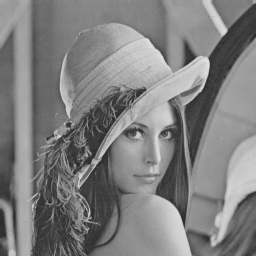

In [91]:
img_array = Image.from_array(array)
img_array

In [100]:
img_array.histogram

In [69]:
img_array.close()

## Histogram

In [123]:
import matplotlib.pyplot as plt
# plt.style.available

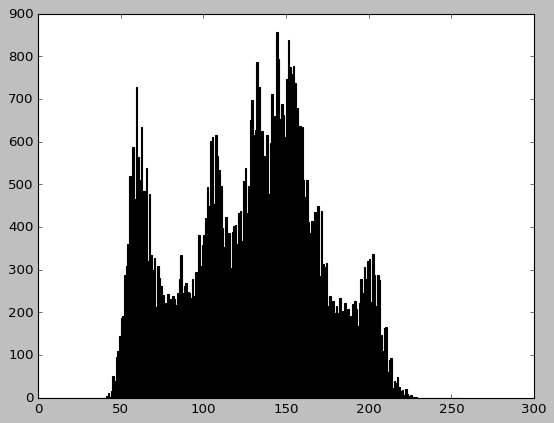

In [140]:
plt.style.use('classic')
plt.hist(array.ravel(),256,[0,256], color='black')
plt.show()

## Find treshold

In [147]:
thresholdValue = int(np.mean(array.ravel()))

In [164]:
array_the = array.copy()

In [165]:
array_the[array_the >= thresholdValue] = 255
array_the[array_the < thresholdValue] = 0

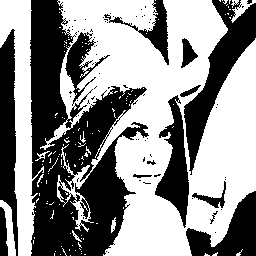

In [166]:
img_array_the = Image.from_array(array_the)
img_array_the

In [167]:
img_array_the.close()